# PlaiCraft DSCI 100 Individual Planning


In this individual planning, I'll analyze and visualize data from Frank Wood's Computer Science research group for their MineCraft server, PlaiCraft, to prepare for the group aspect  using provided datasets, players.csv and sessions.csv.

### The Question

Broad question: "We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts". 

Specific predictive question: 
##### Can age and experience predict the total played hours to target similar players for large data recruitment?

### 1. Data Description and Pre-Inspection

Pre-analysis details:
 - Dat collected: May 1-September 1, 2024
 - Each session was tracked once game was opened to closed
 - Two NA values, two rows missing data
     - I won't drop them as other variables in those rows may be valuable

In [48]:
# Now, let's load some R packages!
library(tidyverse)
library(ggplot2)
library(lubridate)
library(RColorBrewer)

### 2. Inspecting the Datasets with R Functions and Summaries

In [49]:
# Let's read in and inspect the datasets!
url_players <- "https://raw.githubusercontent.com/tchan0717/dsci-100-2025w1-group-36/refs/heads/main/data/players.csv"
players_data <- read_csv(url_players)
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


#### Description of the set (players.csv):

- 196 observations, 7 variables about the players:
1. `experience`: *character* - gaming "level" - Beginner, Amateur, Regular, Veteran, Pro (most experienced)
2. `subscribe`: *logical* - PlaiCraft newsletter subscription: TRUE="yes", FALSE="no"
3. `hashedEmail`: *character* -hashed email
4. `played_hours`: *double* -total hours played
5. `name`: *character* -first name
6. `gender`: *character* -gender
7. `age`: *double* -age

Issues: 
- `subscribe` is ambiguous - likely indicates newsletter subscription
- `experience` "level" order is unclear
    - Assumed order stated above, but no metadata to verify

#### Summary #1 - Experience

In [50]:
experience_count <- players_data |>
                        group_by(experience) |>
                        summarize(count = n())

experience_summary <- experience_count |>
                        ungroup() |>
                        mutate(percent_of_overall = count/sum(count) * 100) |> 
                        mutate(percent_of_overall = round(percent_of_overall, 2))
experience_summary

experience,count,percent_of_overall
<chr>,<int>,<dbl>
Amateur,63,32.14
Beginner,35,17.86
Pro,14,7.14
Regular,36,18.37
Veteran,48,24.49


#### Summary #2 - Played Hours

In [51]:
played_hours_summary <- players_data |>
                            summarize(mean = mean(played_hours, na.rm = TRUE),
                                      sum = sum(played_hours, na.rm = TRUE),
                                      max = max(played_hours),
                                      min = min(played_hours)) |>
                            mutate(across(mean:min, ~ round(.x, 2)))    
played_hours_summary                      

mean,sum,max,min
<dbl>,<dbl>,<dbl>,<dbl>
5.85,1145.8,223.1,0


#### Summary #3 - Subscribed

In [52]:
subscribe_count <- players_data |>
                        group_by(subscribe) |>
                        summarize(count = n())

subscribe_summary <- subscribe_count |>
                        ungroup() |>
                        mutate(percent_of_overall = count/sum(count) * 100) |>
                        mutate(percent_of_overall = round(percent_of_overall, 2))
subscribe_summary

subscribe,count,percent_of_overall
<lgl>,<int>,<dbl>
FALSE,52,26.53
TRUE,144,73.47


#### Summary #4 - Gender

In [53]:
gender_count <- players_data |>
                    group_by(gender) |>
                    summarize(count = n())

gender_summary <- gender_count |>
                        ungroup() |>
                        mutate(percent_of_overall = count/sum(count) * 100) |>
                        mutate(percent_of_overall = round(percent_of_overall, 2))
gender_summary

gender,count,percent_of_overall
<chr>,<int>,<dbl>
Agender,2,1.02
Female,37,18.88
Male,124,63.27
Non-binary,15,7.65
Other,1,0.51
Prefer not to say,11,5.61
Two-Spirited,6,3.06


#### Summary #5 - Age (Years)

In [54]:
age_summary <- players_data |>
                    summarize(mean = mean(Age, na.rm = TRUE),
                              max = max(Age, na.rm = TRUE),
                              min = min(Age, na.rm = TRUE)) |>
                    mutate(across(mean:min, ~ round(.x, 2)))    
age_summary   

mean,max,min
<dbl>,<dbl>,<dbl>
21.14,58,9


In [63]:
# Now, let's read in sessions.csv!
url_sessions <- "https://raw.githubusercontent.com/tchan0717/dsci-100-2025w1-group-36/refs/heads/main/data/sessions.csv"
sessions_data <- read_csv(url_sessions)
sessions_data

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


#### Description of the set (sessions.csv):

- 1535 observations, 5 variables about sessions: 
1. `hashedEmail`: *character* -player's hashed email
2. `start_time`: *character* -start time (DD/MM/YYYY", "time (24-hour-interval)")
4. `end_time`: *character* -end time ("DD/MM/YYYY", time (24-hour-interval)")
5. `original_start_time`: *double* -start time in UNIX (milliseconds)
6. `original_end_time`: *double* -end time in UNIX (milliseconds)

In [56]:
# No issues found. But, to do summaries, I'll wrangle the data to separate dates and times.
sessions_data_tidy <- separate(sessions_data,
                                    end_time,
                                    into = c("end_date", "end_time"),
                                    sep = " ") |>
                                separate(start_time,
                                    into = c("start_date", "start_time"),
                                    sep = " ") |>
                      mutate(start_time = as.numeric(hm(start_time))/3600) |> #hm function from lubridate package makes time into numeric format
                      mutate(end_time = as.numeric(hm(end_time))/3600) #divide by 3600 to get time in hours
sessions_data_tidy

hashedEmail,start_date,start_time,end_date,end_time,original_start_time,original_end_time
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18.2000000,30/06/2024,18.400000,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23.5500000,17/06/2024,23.766667,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17.5666667,25/07/2024,17.950000,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,3.3666667,25/07/2024,3.966667,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16.0166667,25/05/2024,16.200000,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024,15.1333333,23/06/2024,17.166667,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024,7.2000000,15/04/2024,7.350000,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024,2.2166667,21/09/2024,2.500000,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024,2.5166667,21/06/2024,2.816667,1.71894e+12,1.71894e+12


#### Summary #6 - Dates of Sessions

In [57]:
date_total <- sessions_data_tidy |>
                    group_by(start_date) |>
                    summarize(count = n()) |>
                    arrange(desc(count))

pull(head(date_total, 1))
pull(tail(date_total, 1))

[1] 38

[1] 1

In [58]:
# The daily session counts ranged from 1  - 38. Let's find the day(s) with these counts.
date_summary <- date_total |>
                    filter(count %in% c(38, 1))

date_summary

start_date,count
<chr>,<int>
25/07/2024,38
07/09/2024,1
09/04/2024,1
10/06/2024,1
11/09/2024,1
12/07/2024,1
12/09/2024,1
15/07/2024,1
19/07/2024,1


- Least activity: July, September, one in April and June 
- Most activity: July 25

#### Summary #7 - Session Start Times (24 Hour Interval)

In [71]:
start_time_summary <- sessions_data_tidy |>
                            summarize(mean = mean(start_time, na.rm = TRUE),
                                      latest = max(start_time, na.rm = TRUE),
                                      earliest = min(start_time, na.rm = TRUE)) |>
                            mutate(across(mean:earliest, ~ round(.x, 2)))
start_time_summary

mean,latest,earliest
<dbl>,<dbl>,<dbl>
10.69,23.98,0


#### Summary #8 - Session End Times (24 Hour Interval)

In [72]:
end_time_summary <- sessions_data_tidy |>
                            summarize(mean = mean(end_time, na.rm = TRUE),
                                      latest = max(end_time, na.rm = TRUE),
                                      earliest = min(end_time, na.rm = TRUE)) |>
                            mutate(across(mean:earliest, ~ round(.x, 2)))
end_time_summary

mean,latest,earliest
<dbl>,<dbl>,<dbl>
10.09,23.98,0


In [61]:
# I will merge the datasets together too to simplify future explorations:
sessions_players_merged <- merge(players_data, sessions_data_tidy, by = "hashedEmail", all = TRUE)
sessions_players_merged

hashedEmail,experience,subscribe,played_hours,name,gender,Age,start_date,start_time,end_date,end_time,original_start_time,original_end_time
<chr>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,TRUE,1.5,Isaac,Male,20,23/05/2024,0.3666667,23/05/2024,1.1166667,1.71642e+12,1.71643e+12
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,TRUE,1.5,Isaac,Male,20,22/05/2024,23.2000000,23/05/2024,0.2166667,1.71642e+12,1.71642e+12
055d1a2002f6308a95b03b8d17af28f43e9f91ca8b1e1fc439bf4d08b22e7c0f,Veteran,TRUE,0.0,Frankie,Male,17,NA,NA,NA,NA,NA,NA
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,Pro,FALSE,0.4,Lyra,Male,21,28/06/2024,4.4666667,28/06/2024,4.9666667,1.71955e+12,1.71955e+12
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,Beginner,TRUE,0.1,Osiris,Male,17,19/09/2024,21.0166667,19/09/2024,21.2000000,1.72678e+12,1.72678e+12
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,30/08/2024,3.6666667,30/08/2024,4.0666667,1.72499e+12,1.72499e+12
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,27/08/2024,19.3000000,27/08/2024,19.8666667,1.72479e+12,1.72479e+12
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,30/08/2024,17.8166667,30/08/2024,18.8000000,1.72504e+12,1.72504e+12
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,31/08/2024,22.7333333,31/08/2024,23.3333333,1.72514e+12,1.72515e+12


### 3. Exploratory Data Analysis and Visualization


Let's create visualizations to seek out relationships and spot missed issues.

#### Visualization #1

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


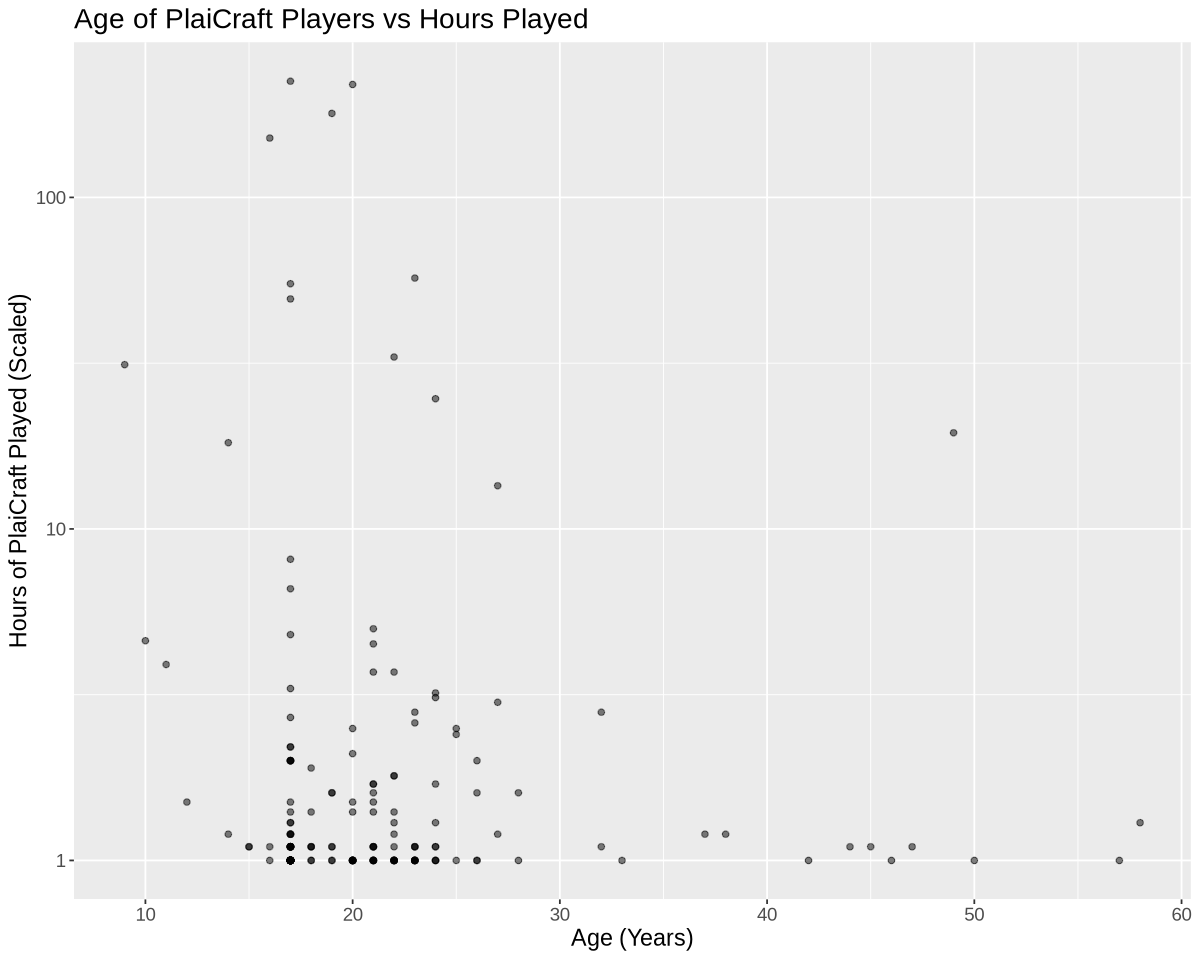

In [45]:
options(repr.plot.width = 10, repr.plot.height = 8)
played_hours_age_plot <- ggplot(players_data, aes(x = Age, y = played_hours + 1)) + #add +1 so that when we log our y-axis, the 0 values won't be infinity
                            geom_point(alpha = 0.5) +
                            labs(x = "Age (Years)", y = "Hours of PlaiCraft Played (Scaled)") +
                            ggtitle("Age of PlaiCraft Players vs Hours Played") +
                            scale_y_log10() +
                            theme(text = element_text(size = 14))
played_hours_age_plot

- No relationship nor clear trend
    - Widespread points
- Condensed near bottom of graph, outliers near top half
- Insinuates teens and young adults play more hours

#### Visualization #2

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


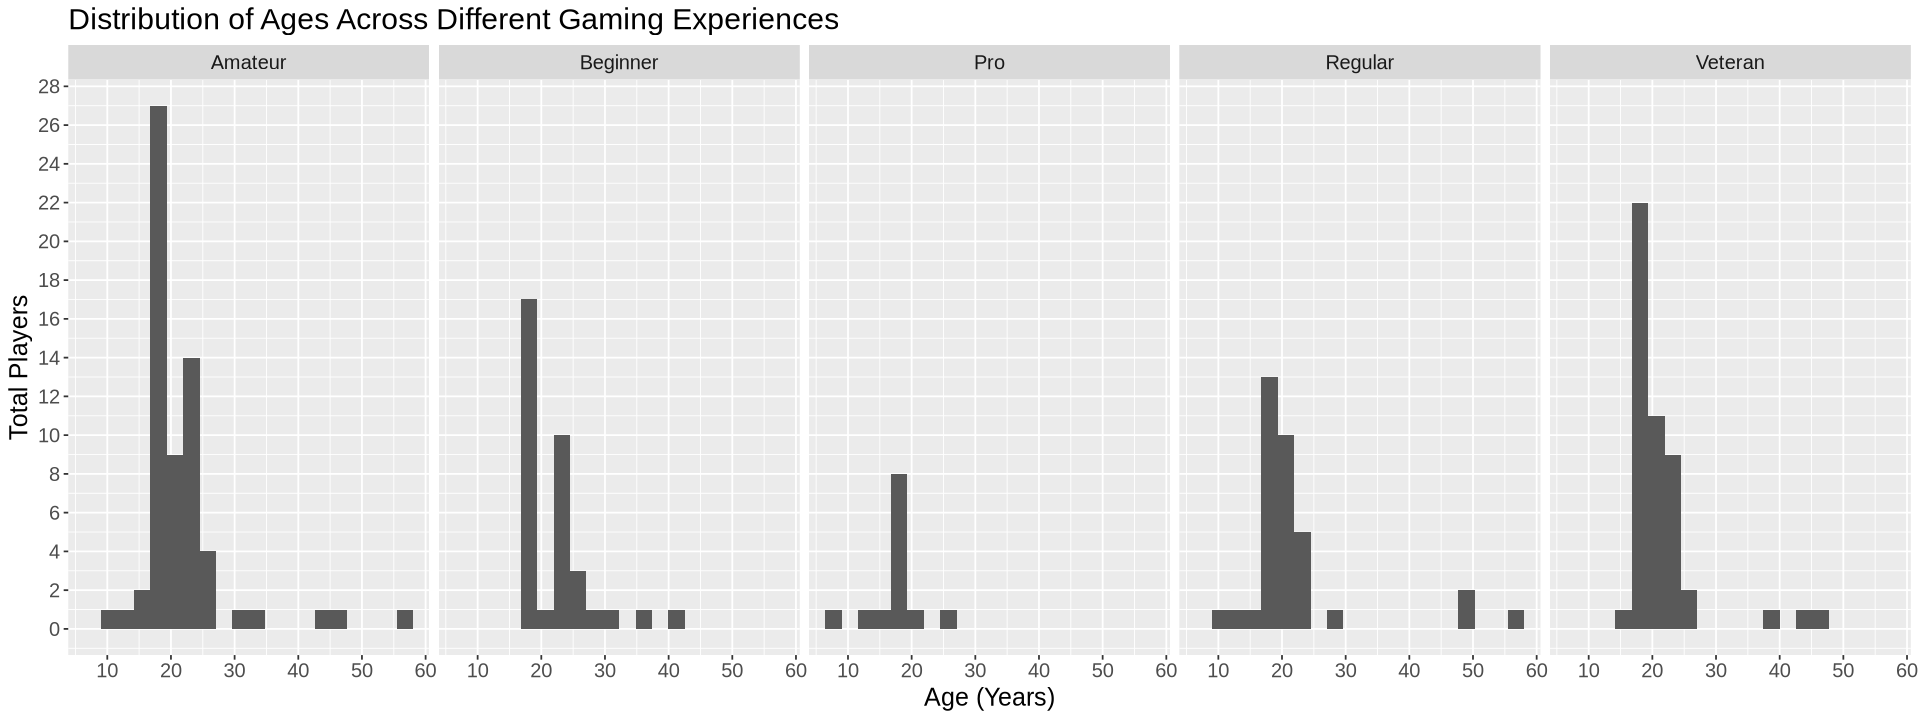

In [46]:
options(repr.plot.width = 16, repr.plot.height = 6)
age_histogram <- ggplot(players_data, aes(x = Age)) +
                    geom_histogram(bins = 20) +
                    labs(x = "Age (Years)", y = "Total Players") +
                    ggtitle("Distribution of Ages Across Different Gaming Experiences") +
                    scale_y_continuous(breaks = seq(0, 28, by = 2)) +
                    scale_x_continuous(breaks = seq(0, 60, by = 10)) +
                    facet_grid(cols = vars(experience)) +
                    theme(text = element_text(size = 15))
age_histogram

- Majority ~17 years old
- Numerous teenagers and young adults
   - Few young children and adults
- Age &ne; to gaming experience
    - ex. Any age can be *"pro"*

#### Visualization #3

`summarise()` has grouped output by 'hashedEmail', 'played_hours'. You can
override using the `.groups` argument.


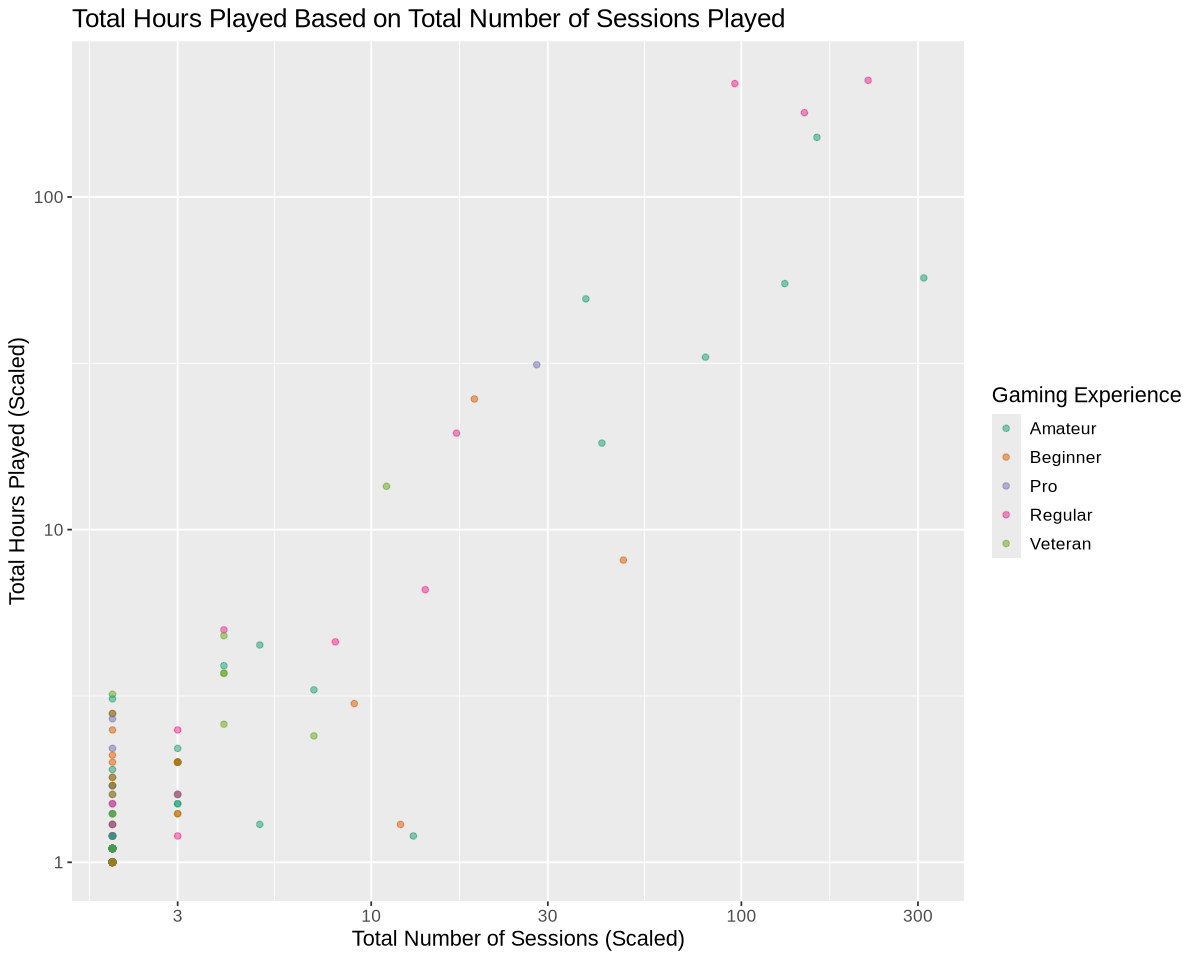

In [47]:
options(repr.plot.width = 10, repr.plot.height = 8)
sessions_hours_total <- sessions_players_merged |>
                        select(hashedEmail, played_hours, experience) |>
                        group_by(hashedEmail, played_hours, experience) |>
                        summarize(count = n())

age_sessions_plot <- sessions_hours_total |>
                        ggplot(aes(x = count + 1, y = played_hours + 1, color = experience)) +
                            geom_point(alpha = 0.5) +
                            labs(x = "Total Number of Sessions (Scaled)", y = "Total Hours Played (Scaled)", colour = "Gaming Experience") +
                            ggtitle("Total Hours Played Based on Total Number of Sessions Played") +
                            scale_color_brewer(palette = "Dark2") +
                            scale_y_log10() +
                            scale_x_log10() +
                            theme(text = element_text(size = 13))
age_sessions_plot                        

- Strong, positive relationship
    - Variables increase together
- Same number of sessions doesn't directly indicate same total hours played
- Gaming experience is fairly scattered
    - Some Regulars and Amateurs played the most

### 4. Methods and Plans

Choosing an appropriate prediction model is important for accurate and strong performances. I'd approach my question using KNN regression with players.csv as it contains played_hours, Age, and experience; all variables I need. The model objective is to input any age and experience to predict the total hours they may contribute, helping decide which players to "target".

KNN regression is appropriate because it's flexible and predicts numerical values like played_hours. Contrastly, KNN classification is for categorical predictions. Based on visualizations above, the variables don't show a linear relationship, so linear regression isn't preferred.

I chose predictor variables, experience and Age, because they describe "kinds" of players. They provide the most meaningful differences in the data to predict played_hours. Typically, they significantly contribute to determining total gametime. For example, pros and younger players may play longer hours. Gender was considered but it felt unreliable because there are "prefer not to say" values which don't help distinguish player "kinds". Similarily, session times are random; it's not a unique behaviour to each player like age and experience.

##### *To process the data, I will follow the general KNN regression model steps with noted adjustments:*
1. Mutate "experience" to numerical levels(1=beginner,...5=pro)
2. Inspect and clean data
3. Split dataset
    - 75% training and 25% testing
4. Tune training set
    - Scale predictors
5. Cross-validate training set
    - 5 folds
    - Range of neighbors, differ by 4; neighbors = 1,5,...196
6. Find optimal *k*, refit model, assess on testing data for RMSPE

KNN regression requires few assumptions, but has drawbacks. It assumes that new observations resemble its training data, which can create inaccurate predictions for observations outside the training data range. A larger dataset means longer computation too. It's also sensitive to noisy data and distance-reliant, so scaling is needed to ensure comparable variable scales.

### GitHub Repository

https://github.com/tchan0717/dsci-100-2025w1-group-36.git

### References

Wickham, Hadley, and Garrett Grolemund. 2016. R for Data Science: Import, Tidy, Transform, Visualize, and Model Data. O’Reilly. https://r4ds.had.co.nz/.
\
\
The Pacific Laboratory of Artificial Intelligence. FAQ. Plaicraft. https://plaicraft.ai/faq. 